In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import operator
from utils import *

modified 0310

# 1. statistics overview

In [3]:
bath_path = '/mnt/qb/work/mlcolab/hzhou52/kt/junyi15/'

# exercise 837, topic 41, area 9
exercise = pd.read_csv(bath_path+'junyi_Exercise_table.csv', encoding = "utf-8",low_memory=False) 
relation = pd.read_csv(bath_path+'relationship_annotation_training.csv', encoding = "utf-8",low_memory=False)
original_log = pd.read_csv(bath_path+'junyi_ProblemLog_original.csv', encoding = "utf-8",low_memory=False)

In [4]:
original_log.head()

,user_id,exercise,problem_type,problem_number,topic_mode,suggested,review_mode,time_done,time_taken,time_taken_attempts,correct,count_attempts,hint_used,count_hints,hint_time_taken_list,earned_proficiency,points_earned
0,12884,time_terminology,analog_word,1,False,False,False,1420714810324490,4,3&1,False,2,False,0,NaN,False,0
1,239464,multiplication_1,0,6,False,False,False,1403098400836660,2,2,True,1,False,0,NaN,False,14
2,147359,adding_decimals_0.5,0,6,False,False,False,1418890695540340,16,16,True,1,False,0,NaN,False,75
3,158155,multiplication_1,0,3,False,False,False,1400469444264040,2,2,True,1,False,0,NaN,False,75
4,147151,subtraction_2,subtraction-2,10,True,True,False,1382650905730160,4,4,True,1,False,0,NaN,False,225


In [6]:
log = original_log
print('The columns of log are ', log.columns)
print('The length of log is {}'.format(len(log)))

print('###########################################')

print(count_unique(log, log.columns))

The columns of log are  Index(['user_id', 'exercise', 'problem_type', 'problem_number', 'topic_mode',
       'suggested', 'review_mode', 'time_done', 'time_taken',
       'time_taken_attempts', 'correct', 'count_attempts', 'hint_used',
       'count_hints', 'hint_time_taken_list', 'earned_proficiency',
       'points_earned'],
      dtype='object')
The length of log is 25925992
###########################################
Number of unique values in user_id: 247606
Number of unique values in exercise: 722
Number of unique values in problem_type: 1194
Number of unique values in problem_number: 5174
Number of unique values in topic_mode: 2
Number of unique values in suggested: 2
Number of unique values in review_mode: 2
Number of unique values in time_done: 25924214
Number of unique values in time_taken: 7903
Number of unique values in time_taken_attempts: 821840
Number of unique values in correct: 2
Number of unique values in count_attempts: 386
Number of unique values in hint_used: 2
Num

In [8]:
check_nan(log)

Number of NaN values in column user_id: 0
Number of NaN values in column exercise: 0
Number of NaN values in column problem_type: 0
Number of NaN values in column problem_number: 0
Number of NaN values in column topic_mode: 0
Number of NaN values in column suggested: 0
Number of NaN values in column review_mode: 0
Number of NaN values in column time_done: 0
Number of NaN values in column time_taken: 0
Number of NaN values in column time_taken_attempts: 62365
Number of NaN values in column correct: 0
Number of NaN values in column count_attempts: 0
Number of NaN values in column hint_used: 0
Number of NaN values in column count_hints: 0
Number of NaN values in column hint_time_taken_list: 24254263
Number of NaN values in column earned_proficiency: 0
Number of NaN values in column points_earned: 0


In [5]:
exercise.head()

,name,live,prerequisites,h_position,v_position,creation_date,seconds_per_fast_problem,pretty_display_name,short_display_name,topic,area
0,parabola_intuition_1,True,recognizing_conic_sections,47,2,2012-10-11 17:55:24.8056 UTC,13.0,?物線直覺 1,?物線直覺1,conic-sections,algebra
1,circles_and_arcs,True,NaN,40,-20,2012-10-11 17:55:33.41014 UTC,27.0,圓與弧,圓與弧,area-perimeter-and-volume,geometry
2,inscribed_angles_3,True,inscribed_angles_2,44,-22,2012-10-11 17:55:44.11836 UTC,5.0,圓周角與圓心角換算 3,圓周角與圓心角換算3,circle-properties,geometry
3,solving_quadratics_by_factoring,True,factoring_polynomials_1,50,-2,2012-10-11 17:54:59.28029 UTC,7.0,因式分解法,因式分解法,quadtratics,algebra
4,graphing_parabolas_1,True,graphing_parabolas_0.5,52,0,2012-10-11 17:55:00.48268 UTC,24.0,畫拋物線 1,畫拋物線1,quadtratics,algebra


In [7]:
relation.head()

,Exercise_A,Exercise_B,Similarity_avg,Similarity_raw,Difficulty_avg,Difficulty_raw,Prerequisite_avg,Prerequisite_raw
0,radius_diameter_and_circumference,arithmetic_word_problems_1,1.857143,1_4_1_1_1_1_2_1_1_1_3_1_3_5,2.857143,4_5_1_1_1_1_7_1_1_4_2_5_2_5,3.000000,1_6_1_1_1_3_2_1_9_2_3_2_8_2
1,radius_diameter_and_circumference,parts_of_circles,6.785714,6_9_6_6_7_8_7_8_8_8_4_6_5_7,2.428571,3_5_1_3_2_1_5_1_1_1_1_2_5_3,7.285714,6_7_7_6_8_8_9_5_9_9_7_7_5_9
2,radius_diameter_and_circumference,perimeter_of_squares_and_rectangles,3.571429,2_6_4_1_1_2_4_4_7_2_3_4_4_6,2.285714,2_5_1_1_1_1_3_2_1_1_5_2_3_4,5.000000,2_6_5_4_2_8_3_5_9_5_5_3_7_6
3,vertex_of_a_parabola,solving_quadratics_by_taking_the_square_root,5.923077,6_7_6_7_8_4_5_4_3_6_6_8_7,3.307692,3_3_3_1_2_2_4_4_4_3_5_5_4,5.846154,5_8_7_7_6_2_6_5_6_7_3_7_7
4,vertex_of_a_parabola,completing_the_square_1,5.692308,7_5_7_8_3_4_5_5_3_6_7_7_7,3.307692,2_3_3_4_2_2_4_4_5_3_4_4_3,5.461538,6_4_6_8_2_2_5_6_5_6_7_7_7


In [12]:
interested_col = [
    'user_id', 'exercise', 'problem_number', 'time_done', 'time_taken', 'correct', 
]
invert_col = [
    'user_id', 'skill_id', 'problem_id', 'timestamp', 'dwell_time', 'correct', 
]

skill_index = 'exercise'
user_index = 'user_id'

In [13]:
log['correct'].mean()

0.8278744358171521

# 2. remove learner logs with threshold

In [14]:
remove_thres = [50, 100, 150, 200]

log = original_log
for thres in remove_thres:
    print('remove threshold is {}'.format(thres))
    log = log[~log[skill_index].isna()]
    log = remove_log(log, user_index, num=thres)
    count_unique(log, [user_index, skill_index])
    print(len(log),'/',log[user_index].nunique(),'/',log[skill_index].nunique())

remove threshold is 50
Number of unique values in user_id: 62124
Number of unique values in exercise: 721
23907121 / 62124 / 721
remove threshold is 100
Number of unique values in user_id: 41933
Number of unique values in exercise: 721
22475124 / 41933 / 721
remove threshold is 150
Number of unique values in user_id: 32384
Number of unique values in exercise: 721
21306869 / 32384 / 721
remove threshold is 200
Number of unique values in user_id: 26629
Number of unique values in exercise: 721
20314363 / 26629 / 721


## 2.1 find exercise id in exercise table

In [15]:
# exercise-id re-match
num_ex = len(exercise)

ex_new_id = pd.DataFrame(columns=['exercise_name', 'exercise_id', 'prerequisite_name', 'prerequisite_id'])
ex_new_id['exercise_name'] = exercise.name
ex_new_id['exercise_id'] = np.arange(len(exercise))
ex_new_id['prerequisite_name'] = exercise.prerequisites

for i in range(len(ex_new_id.prerequisite_name)):
    pre = ex_new_id['prerequisite_name'][i]
    ind = exercise.loc[exercise.name == pre].index
    if len(ind) == 0:
        ex_new_id.prerequisite_id[i] = np.nan
    else:
        ex_new_id.prerequisite_id[i] = ind[0]

In [17]:
log = original_log
for thres in remove_thres:
    print(f'Remove threshold is {thres}')

    # log = log[~log[skill_index.isna()]]
    log = remove_log(log, user_index, num=thres)

    # Create new DataFrame with desired columns
    df = log[interested_col].copy()
    df.columns = invert_col
    
    # Re-index columns
    skill_dict = dict(zip(ex_new_id.exercise_name, ex_new_id.exercise_id))
    df['skill_id'] = df['skill_id'].apply(lambda x: skill_dict[x])
    df['problem_id'] = pd.Categorical(df['problem_id'], categories=df['problem_id'].unique()).codes
    df['user_id'] = pd.Categorical(df['user_id'], categories=df['user_id'].unique()).codes
    df = df.astype({'timestamp': np.float64, 'correct': np.float64})
    df = df.astype({'user_id': np.int64, 'skill_id': np.int64})
    
    # Save cleaned DataFrame to a CSV file
    df.to_csv(f'/mnt/qb/work/mlcolab/hzhou52/kt/junyi15/multi_skill/interactions_{thres}.csv', sep='\t', index=False)

    print(f'Remove threshold {thres} is done!')
    print(count_unique(df, df.columns.tolist()))
    print(f'Length of DataFrame: {len(df)}')

Remove threshold is 50
Remove threshold 50 is done!
Number of unique values in user_id: 62124
Number of unique values in skill_id: 721
Number of unique values in problem_id: 5174
Number of unique values in timestamp: 23905466
Number of unique values in dwell_time: 7197
Number of unique values in correct: 2
None
Length of DataFrame: 23907121
Remove threshold is 100
Remove threshold 100 is done!
Number of unique values in user_id: 41933
Number of unique values in skill_id: 721
Number of unique values in problem_id: 5174
Number of unique values in timestamp: 22473616
Number of unique values in dwell_time: 6970
Number of unique values in correct: 2
None
Length of DataFrame: 22475124
Remove threshold is 150
Remove threshold 150 is done!
Number of unique values in user_id: 32384
Number of unique values in skill_id: 721
Number of unique values in problem_id: 5174
Number of unique values in timestamp: 21305436
Number of unique values in dwell_time: 6785
Number of unique values in correct: 2
No

In [19]:
df

,user_id,skill_id,problem_id,timestamp,dwell_time,correct
0,0,69,0,1.420715e+15,4,0.0
4,1,433,1,1.382651e+15,4,1.0
6,2,778,0,1.395367e+15,19,0.0
8,3,666,2,1.395809e+15,4,1.0
9,4,440,3,1.394098e+15,2,1.0
...,...,...,...,...,...,...
25925987,12565,763,4,1.377638e+15,7,1.0
25925988,20753,316,6,1.402971e+15,34,1.0
25925989,21092,51,80,1.397029e+15,18,1.0
25925990,11805,681,19,1.396568e+15,2,1.0


# 3. extract single learner 

In [20]:
remove_thres = [50, 100, 150, 200]

log = original_log

users = []
users_log = log.groupby([user_index, skill_index]).size().reset_index(name='count')

for thres in remove_thres:
    users.append(users_log[users_log['count']>thres])

In [ ]:
interested_col = [
    'user_id', 'exercise', 'problem_number', 'time_done', 'time_taken', 'correct', 
]
invert_col = [
    'user_id', 'skill_id', 'problem_id', 'timestamp', 'dwell_time', 'correct', 
]

skill_index = 'exercise'
user_index = 'user_id'

In [ ]:
######################################## single_user_single_exercise
from tqdm import tqdm
log = original_log
useful_log = log[interested_col]
remove_thres = [50, 100, 150, 200]

users_logs_threshold = []
for i in range(len(remove_thres)):
    thres = remove_thres[i]
    users_with_threshold = users[i]
    
    single_skill = {col: [] for col in interested_col}

    sk_dfs = []
    print('With threshold {} there are {} logs'.format(thres, len(users_with_threshold)))
    for j in tqdm(range(len(users_with_threshold))):
        id = users_with_threshold[user_index].iloc[j]
        ex = users_with_threshold[skill_index].iloc[j]

        single_user_exercise = useful_log.loc[(useful_log[user_index] == id) & (useful_log[skill_index] == ex)]
        single_user_exercise = single_user_exercise.sort_values('time_done')[:thres]

        sk_dfs.append(single_user_exercise)
    users_logs_threshold.append(sk_dfs)

With threshold 50 there are 55086 logs


 20%|██        | 11254/55086 [3:52:50<15:09:47,  1.25s/it]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 45%|████▌     | 24793/55086 [8:34:07<10:20:31,  1.23s/it]

# find ground-truth knowledge graph

In [5]:
# exercise-id re-match
num_ex = len(exercise)

ex_new_id = pd.DataFrame(columns=['exercise_name', 'exercise_id', 'prerequisite_name', 'prerequisite_id'])
ex_new_id['exercise_name'] = exercise.name
ex_new_id['exercise_id'] = np.arange(len(exercise))
ex_new_id['prerequisite_name'] = exercise.prerequisites

for i in range(len(ex_new_id.prerequisite_name)):
    pre = ex_new_id['prerequisite_name'][i]
    ind = exercise.loc[exercise.name == pre].index
    if len(ind) == 0:
        ex_new_id.prerequisite_id[i] = np.nan
    else:
        ex_new_id.prerequisite_id[i] = ind[0]

In [6]:
ex_new_id.head()

,exercise_name,exercise_id,prerequisite_name,prerequisite_id
0,parabola_intuition_1,0,recognizing_conic_sections,524
1,circles_and_arcs,1,NaN,NaN
2,inscribed_angles_3,2,inscribed_angles_2,331
3,solving_quadratics_by_factoring,3,factoring_polynomials_1,673
4,graphing_parabolas_1,4,graphing_parabolas_0.5,330


In [7]:
check_nan(ex_new_id)

number of NaN in column exercise_name: 0
number of NaN in column exercise_id: 0
number of NaN in column prerequisite_name: 95
number of NaN in column prerequisite_id: 284


In [8]:
import networkx as nx
G = nx.DiGraph()

# create nodes for the graph, with label as the nodes' name
node_label = [(ex_new_id.exercise_id[i], dict(name=ex_new_id.exercise_name[i])) for i in range(len(ex_new_id))]
G.add_nodes_from(node_label)

# the edge of the graph; a->b means a is a prerequiste of b
edge = []
for i in range(len(ex_new_id)):
    if not pd.isna(ex_new_id.prerequisite_id[i]):
        edge.append((ex_new_id.prerequisite_id[i], ex_new_id.exercise_id[i]))
G.add_edges_from(edge)

# add position of each node on the graph
pos = dict()
for i in range(num_ex):
    pos.update({i: (exercise.h_position[i], exercise.v_position[i])})

# save adjacancy matrix to numpy file
adj = nx.adjacency_matrix(G).toarray()
path = '/mnt/qb/work/mlcolab/hzhou52/kt/junyi/adj.npy'
np.save(path, adj)

AttributeError: 'DataFrame' object has no attribute 'name'

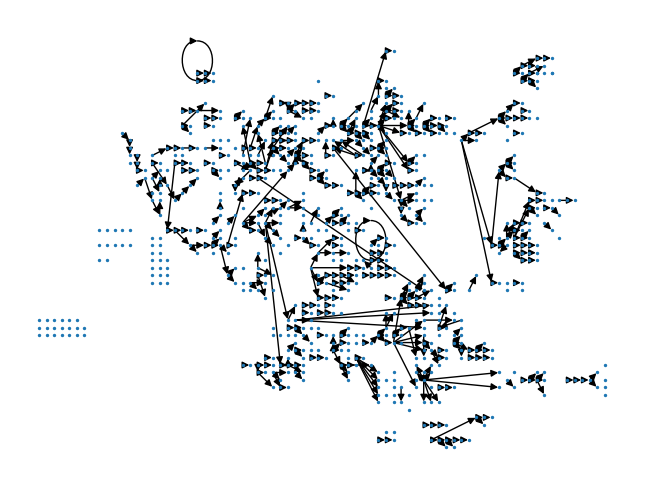

In [9]:
# visualize
nx.draw(G, with_labels=False, pos=pos, node_size=2)
nx.draw(G, labels=ex_new_id.name)

In [ ]:
# lets see if i can make it interactive

In [ ]:
# !pip install bokeh

In [ ]:
# from bokeh.io import output_notebook, show, save
# output_notebook()
# from bokeh.io import output_notebook, show, save
# from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
# from bokeh.plotting import figure
# from bokeh.plotting import from_networkx

In [ ]:
# #Choose a title!
# title = 'Junyi Knowledge Graph'

# #Establish which categories will appear when hovering over each node
# HOVER_TOOLTIPS = [("Name", "@index")]

# #Create a plot — set dimensions, toolbar, and title
# plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

# #Create a network graph object with spring layout
# # https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
# network_graph = from_networkx(G, nx.spring_layout, scale=10, center=(0, 0))

# #Set node size and color
# network_graph.node_renderer.glyph = Circle(size=15, fill_color='skyblue')

# #Set edge opacity and width
# network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

# #Add network graph to the plot
# plot.renderers.append(network_graph)

# show(plot)
# #save(plot, filename=f"{title}.html")

# statistics check

In [82]:
df = df.astype({
    'timestamp': np.float64,
    'dwell_time': np.float64,
    'correct': np.float64,
    'problem_id': np.int64,
    'skill_id': np.int64
    })

In [83]:
# Save
remove_thres = 800
df.to_csv(bath_path+'interactions_{}.csv'.format(remove_thres), sep='\t', index=False)

In [25]:
count_unique(df, list(df.columns))
len(df)

number of unique value in user_id: 26629
number of unique value in problem_id: 721
number of unique value in skill_id: 721
number of unique value in timestamp: 20312955
number of unique value in dwell_time: 6634
number of unique value in correct: 2
number of unique value in skill_name: 721


20314363